### Download the dataset

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

Dataset URL: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
License(s): CC0-1.0
 94% 248M/262M [00:02<00:00, 145MB/s]
100% 262M/262M [00:02<00:00, 112MB/s]


In [4]:
!ls

craigslist-carstrucks-data.zip	sample_data


In [5]:
!unzip craigslist-carstrucks-data.zip -d .

Archive:  craigslist-carstrucks-data.zip
  inflating: ./vehicles.csv          


### Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('vehicles.csv')

In [8]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [9]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [11]:
df.shape

(426880, 26)

### got the number and percentage of null values in each column in acsending order

In [12]:
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [14]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print(missing_percentage.sort_values(ascending=True))

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
state             0.000000
image_url         0.015930
posting_date      0.015930
description       0.016398
year              0.282281
transmission      0.598763
fuel              0.705819
odometer          1.030735
model             1.236179
lat               1.534155
long              1.534155
title_status      1.930753
manufacturer      4.133714
type             21.752717
paint_color      30.501078
drive            30.586347
VIN              37.725356
condition        40.785232
cylinders        41.622470
size             71.767476
county          100.000000
dtype: float64


### got the number of duplicated data rows

In [32]:
df.duplicated().sum()

0

### Important Columns for EDA

For the "Used Cars Dataset," the following columns are identified as most important for exploratory data analysis (EDA) and should be retained:

---

#### **Critical Columns for EDA**
1. **`price`**:
   - The main target variable for analysis.
   - Focus on price distribution, outliers, and relationships with other features.

2. **`year`**:
   - Indicates the car's model year, which impacts price and condition.
   - Helps analyze trends over time (e.g., newer cars vs. older cars).

3. **`odometer`**:
   - Reflects mileage, which is a significant factor in car valuation.
   - Analyze correlations with `price` and condition.

4. **`manufacturer`**:
   - A key categorical variable to analyze pricing and popularity trends across brands.

5. **`model`**:
   - Essential for understanding specific car models' popularity and their impact on price.

6. **`condition`**:
   - Indicates the car's state (e.g., new, like new, excellent, etc.).
   - Important for segmenting cars and analyzing their pricing.

7. **`fuel`**:
   - Relevant for understanding preferences for fuel types and their impact on pricing.

8. **`transmission`**:
   - Analyze the influence of transmission type (automatic, manual) on pricing and demand.

9. **`drive`**:
   - Indicates drivetrain type (e.g., FWD, RWD, 4WD), which could affect price based on location (e.g., 4WD in snowy regions).

10. **`type`**:
    - Car type (e.g., SUV, sedan, truck) significantly influences pricing and preferences.

11. **`paint_color`**:
    - Could reveal trends in popular colors and their impact on pricing.

---

#### **Geographical Columns (Optional)**
1. **`region`** and **`state`**:
   - Useful for regional analysis of car listings and prices.
   - Analyze demand trends by location.

2. **`lat`** and **`long`**:
   - Can be useful for visualizing geographic trends (e.g., heatmaps of listings).

---

#### **Columns to Consider Dropping**
1. **`size`**:
   - High missing values and might not add much value unless explicitly needed.

2. **`VIN`**:
   - VIN is typically used for unique identification but doesn't add much analytical value here.

3. **`county`**:
   - Completely missing and irrelevant.

4. **`description`**, **`image_url`**, **`posting_date`**, **`url`**:
   - Likely irrelevant unless you're performing text-based analysis.

---


### Use only necessary columns

In [48]:
important_columns = [
    'price', 'year', 'odometer', 'manufacturer', 'model',
    'condition', 'fuel', 'transmission', 'drive', 'type',
    'paint_color', 'region', 'state', 'lat', 'long'
]
df = df[important_columns]

In [49]:
df.head()

,price,year,odometer,manufacturer,model,condition,fuel,transmission,drive,type,paint_color,region,state,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prescott,az,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fayetteville,ar,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florida keys,fl,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,worcester / central MA,ma,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,greensboro,nc,NaN,NaN


- As the size of data is large enough, I'm going to remove null values and continue with the remaining of the dataset

In [50]:
df.dropna(inplace=True)

In [51]:
# Verify if any missing values remain
df.isnull().sum()

,0
price,0
year,0
odometer,0
manufacturer,0
model,0
condition,0
fuel,0
transmission,0
drive,0
type,0


In [52]:
df.head()

,price,year,odometer,manufacturer,model,condition,fuel,transmission,drive,type,paint_color,region,state,lat,long
31,15000,2013.0,128000.0,ford,f-150 xlt,excellent,gas,automatic,rwd,truck,black,auburn,al,32.5920,-85.518900
32,27990,2012.0,68696.0,gmc,sierra 2500 hd extended cab,good,gas,other,4wd,pickup,black,auburn,al,32.5900,-85.480000
33,34590,2016.0,29499.0,chevrolet,silverado 1500 double,good,gas,other,4wd,pickup,silver,auburn,al,32.5900,-85.480000
34,35000,2019.0,43000.0,toyota,tacoma,excellent,gas,automatic,4wd,truck,grey,auburn,al,32.6013,-85.443974
35,29990,2016.0,17302.0,chevrolet,colorado extended cab,good,gas,other,4wd,pickup,red,auburn,al,32.5900,-85.480000


In [54]:
df.shape

(141551, 15)

### EDA Analysis
### Business Questions and Answers

#### 1 - What is the average price of cars by year?

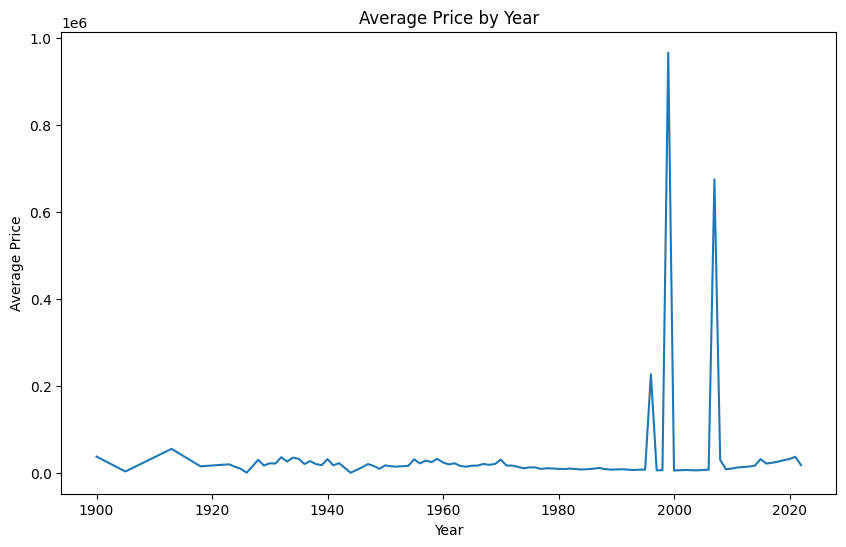

In [90]:
# Average price by year
avg_price_by_year = df.groupby('year')['price'].mean()

# Plot the data
plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)

# Add titles and labels
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')

# Set y-axis limits based on the data range
# plt.ylim(avg_price_by_year.min() - 1000, avg_price_by_year.max() + 1000)  # Adjust margins as needed

# Show the plot
plt.show()

#### 2 - What is the relationship between car mileage (odometer) and price?

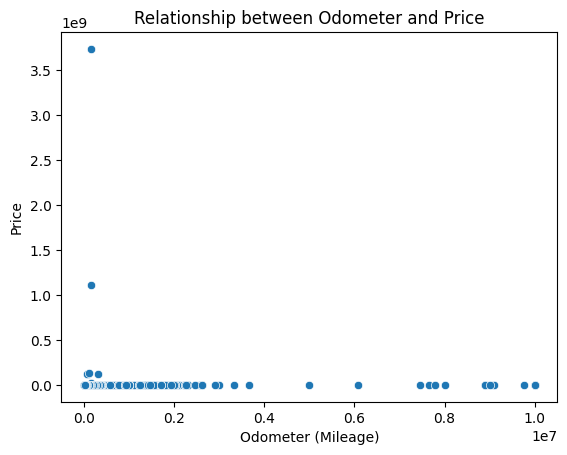

In [83]:
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Relationship between Odometer and Price')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Price')
plt.show()

#### 3 - Which manufacturers have the highest average car prices?


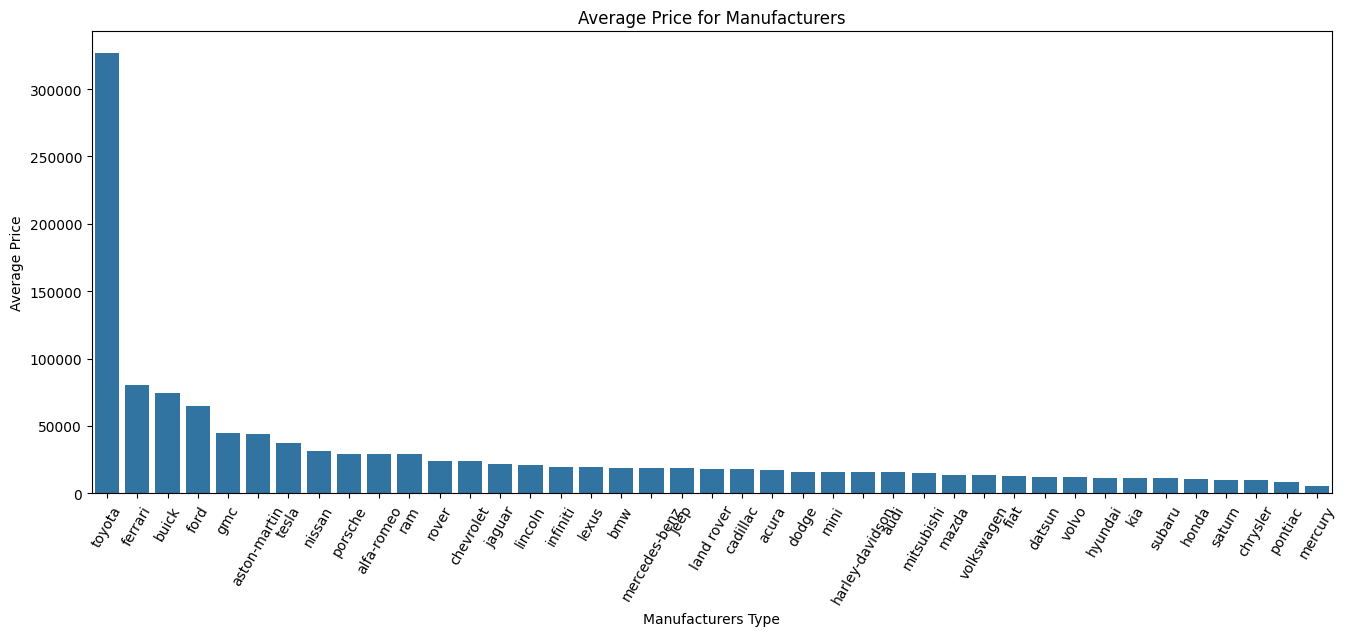

In [123]:
# Average price by manufacturer
avg_price_by_manufacturer = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Set the figure size (width, height)
plt.figure(figsize=(16, 6))

# Create the barplot
sns.barplot(x=avg_price_by_manufacturer.index, y=avg_price_by_manufacturer.values)

# Rotate the x-axis labels by 60 degrees
plt.xticks(rotation=60)

# Set the title and labels
plt.title('Average Price for Manufacturers')
plt.xlabel('Manufacturers Type')
plt.ylabel('Average Price')

# Show the plot
plt.show()

#### 4 - What is the distribution of car prices by fuel type?

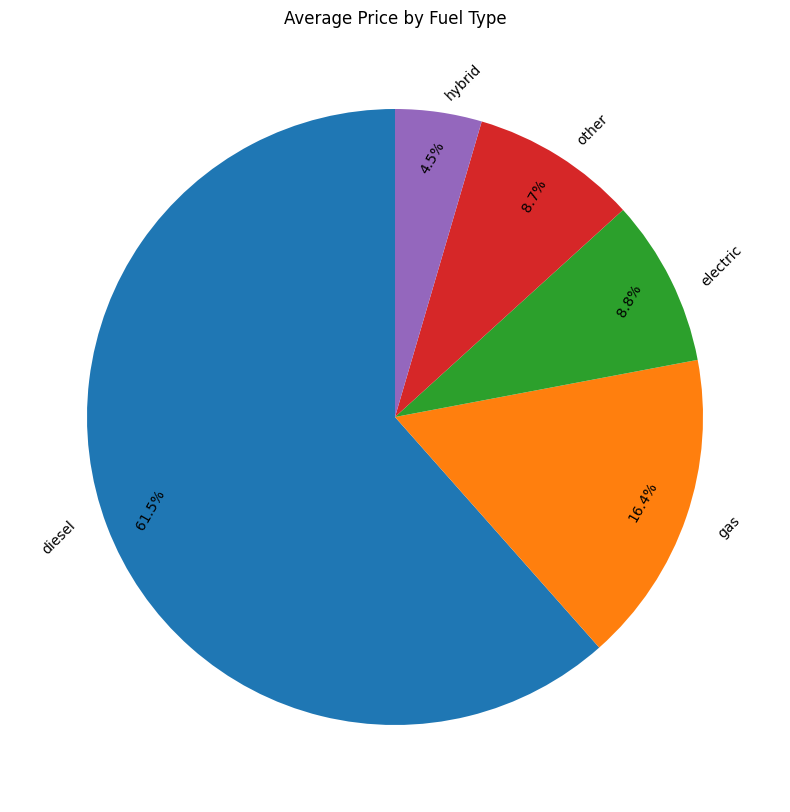

In [100]:
# Average price by fuel type
fuel_price = df.groupby('fuel')['price'].mean().sort_values(ascending=False)

# Plot a pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(fuel_price, labels=fuel_price.index,
                                   autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Rotate the percentage labels by 60 degrees
for autotext in autotexts:
    autotext.set_rotation(60)

# Rotate the manufacturer names by 45 degrees
for text in texts:
    text.set_rotation(45)

plt.title('Average Price by Fuel Type')
plt.show()

#### 5 - How does the car's condition affect its price?



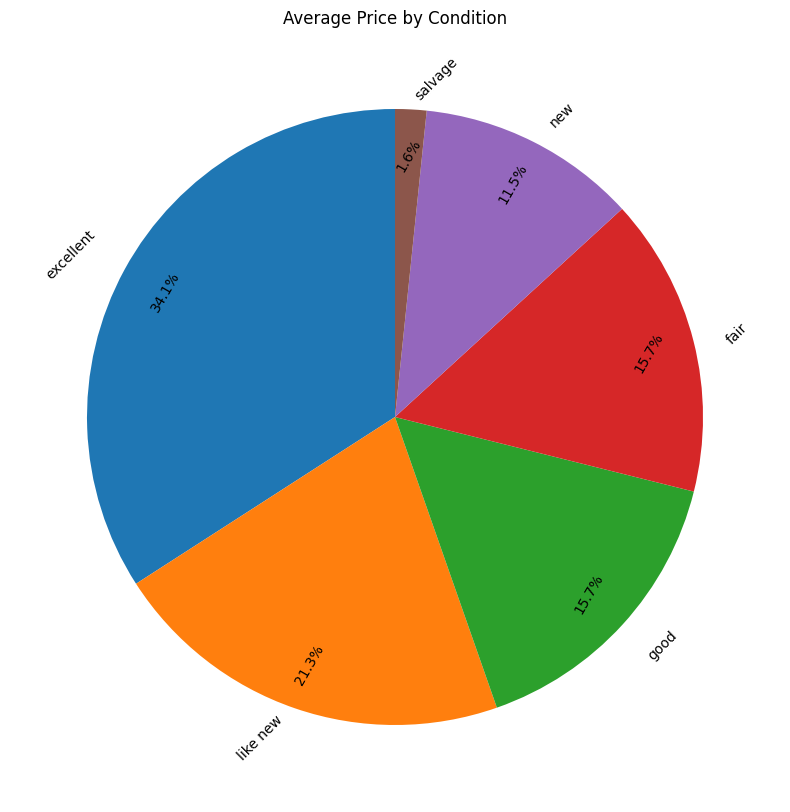

In [101]:
# Average price by car's condition
condition_price = df.groupby('condition')['price'].mean().sort_values(ascending=False)

# Plot a pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(condition_price, labels=condition_price.index,
                                   autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Rotate the percentage labels by 60 degrees
for autotext in autotexts:
    autotext.set_rotation(60)

# Rotate the manufacturer names by 45 degrees
for text in texts:
    text.set_rotation(45)

plt.title('Average Price by Condition')
plt.show()

#### 6 - What are the most popular car types (e.g., SUV, sedan, truck) and how do they vary in price?

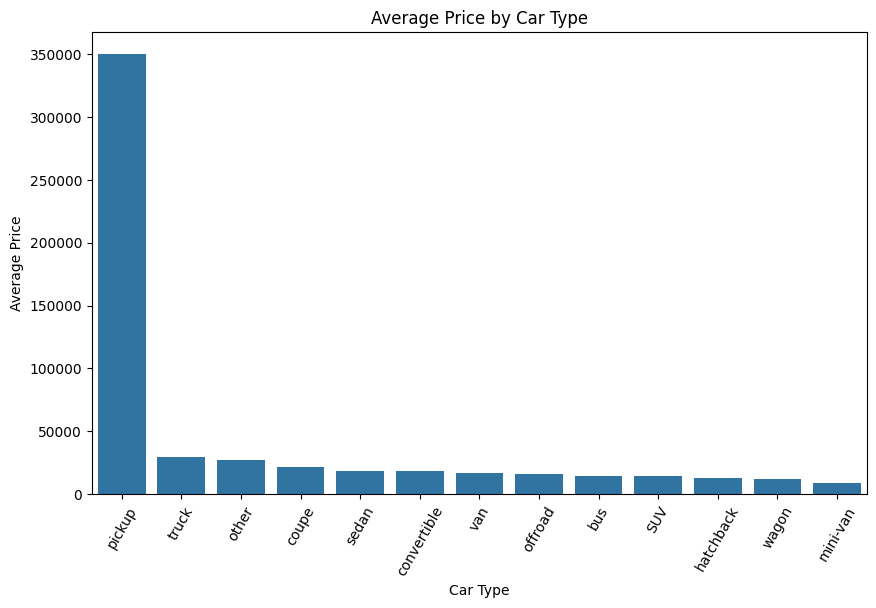

In [122]:
# Average price by car type
type_price = df.groupby('type')['price'].mean().sort_values(ascending=False)

# Set the figure size (width, height)
plt.figure(figsize=(10, 6))

# Create the barplot
sns.barplot(x=type_price.index, y=type_price.values)

# Rotate the x-axis labels by 60 degrees
plt.xticks(rotation=60)

plt.title('Average Price by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Average Price')
plt.show()

#### 7 - What is the most common car model in terms of listings?


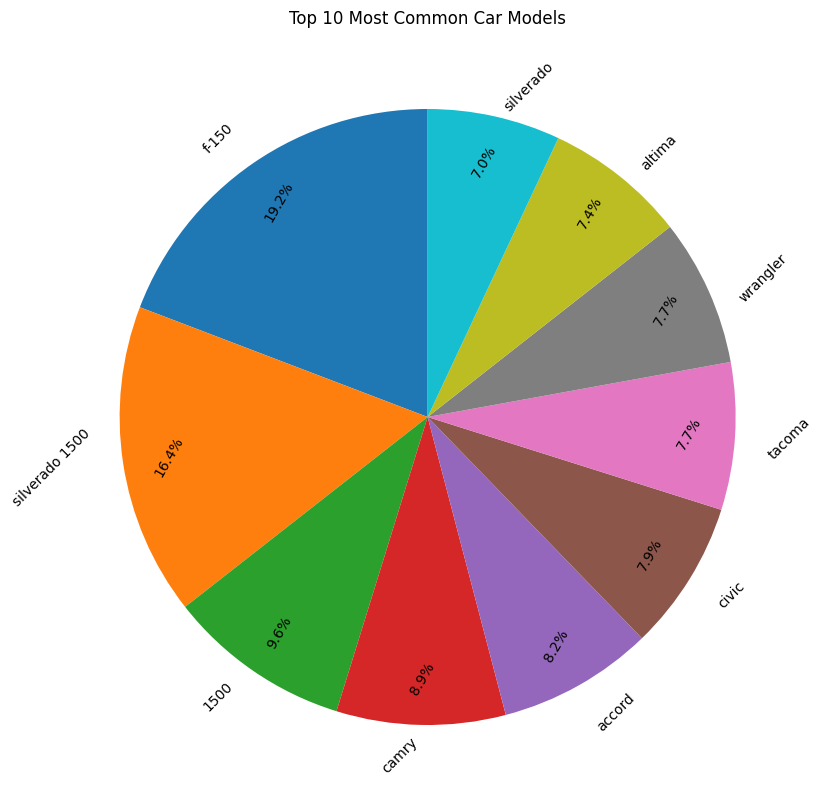

In [103]:
# Average price by car model
model_counts = df['model'].value_counts().head(10)  # Top 10 most common models

# Plot a pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(model_counts, labels=model_counts.index,
                                   autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Rotate the percentage labels by 60 degrees
for autotext in autotexts:
    autotext.set_rotation(60)

# Rotate the manufacturer names by 45 degrees
for text in texts:
    text.set_rotation(45)

plt.title('Top 10 Most Common Car Models')
plt.show()

#### 8 - Does transmission type (manual vs. automatic) influence car prices?

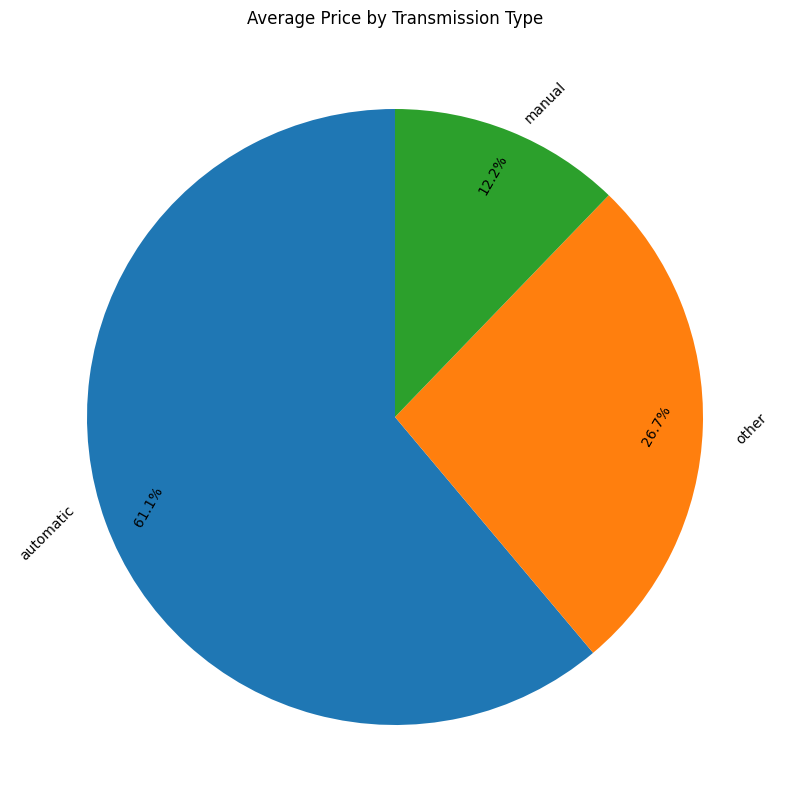

In [105]:
# Average price by transmission type
transmission_price = df.groupby('transmission')['price'].mean().sort_values(ascending=False)

# Plot a pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(transmission_price, labels=transmission_price.index,
                                   autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Rotate the percentage labels by 60 degrees
for autotext in autotexts:
    autotext.set_rotation(60)

# Rotate the manufacturer names by 45 degrees
for text in texts:
    text.set_rotation(45)

plt.title('Average Price by Transmission Type')
plt.show()

#### 9 - What is the distribution of car prices by state?

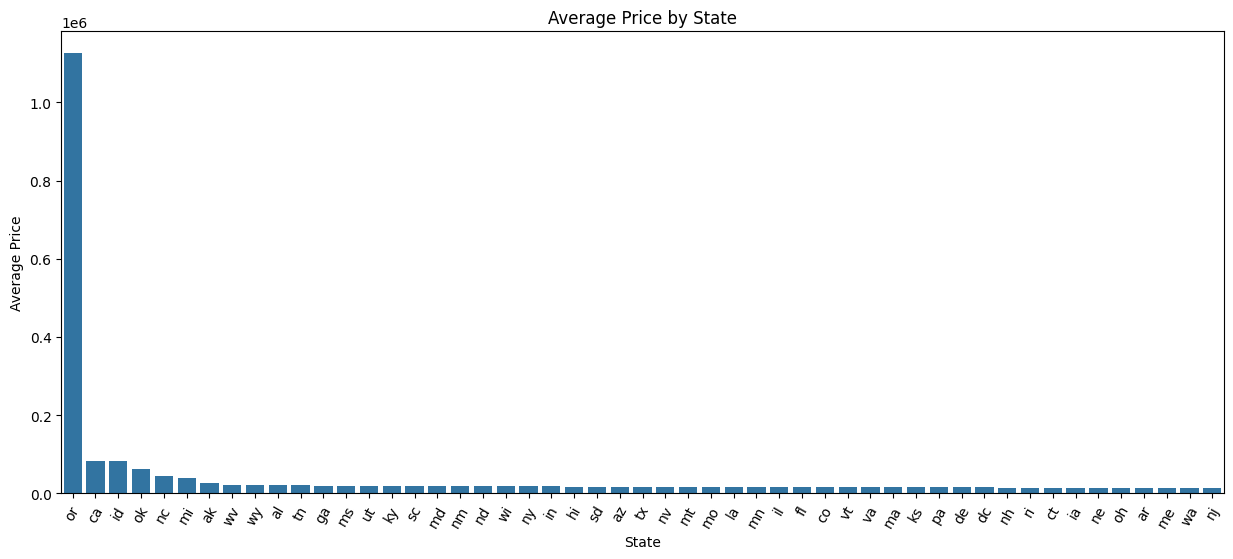

In [124]:
# Average price by state
state_price = df.groupby('state')['price'].mean().sort_values(ascending=False)

# Set the figure size (width, height)
plt.figure(figsize=(15, 6))

# Create the barplot
sns.barplot(x=state_price.index, y=state_price.values)

# Rotate the x-axis labels by 60 degrees
plt.xticks(rotation=60)

plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.show()

#### 10 - Is there a correlation between car price and its location (latitude and longitude)?


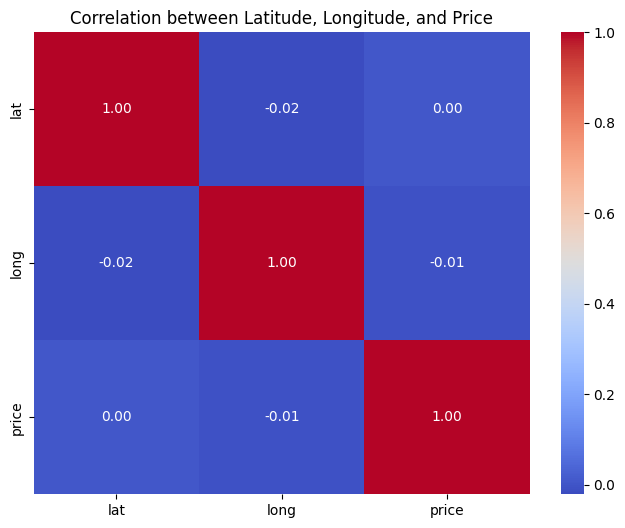

In [110]:
# Combine the correlation matrices into one for better visualization
corr_matrix = df[['lat', 'long', 'price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Add titles and labels
plt.title('Correlation between Latitude, Longitude, and Price')
plt.show()

there's no correlation between the proce and longitude or latitude.

#### 11 - How does the paint color of the car affect its price?

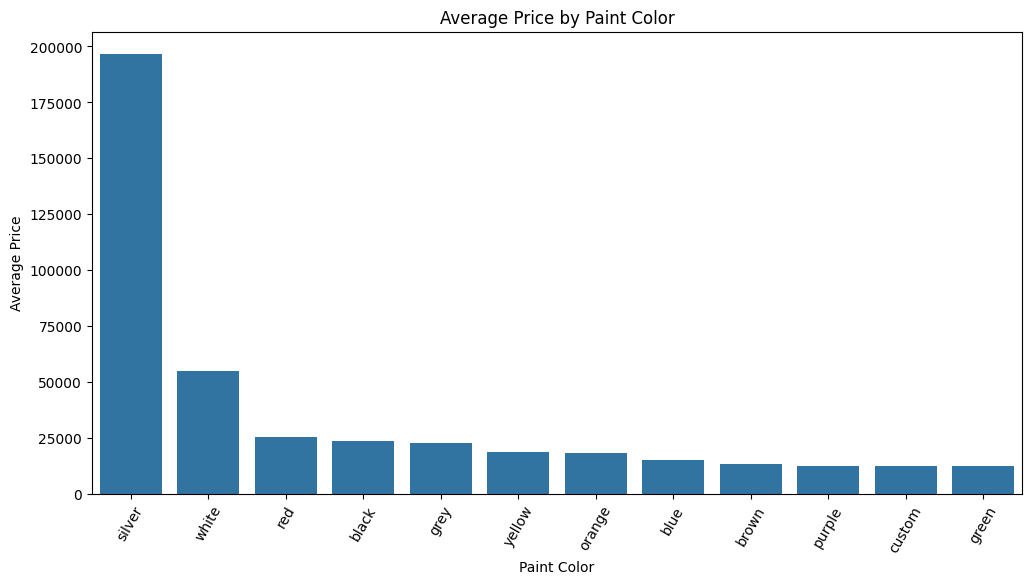

In [125]:
# Average price by paint color
paint_color_price = df.groupby('paint_color')['price'].mean().sort_values(ascending=False)

# Set the figure size (width, height)
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(x=paint_color_price.index, y=paint_color_price.values)

# Rotate the x-axis labels by 60 degrees
plt.xticks(rotation=60)

plt.title('Average Price by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.show()

#### 12 - What is the average price of cars based on the region (top 10)

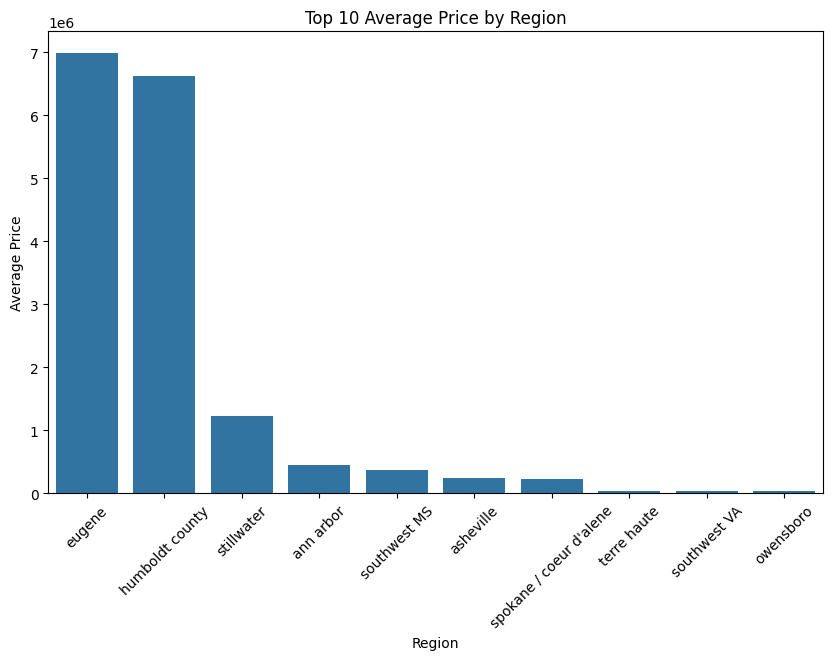

In [115]:
# Average price by region
region_price = df.groupby('region')['price'].mean().sort_values(ascending=False)

# Select the top 10 regions with the highest average prices
top_10_region_price = region_price.head(10)

# Plot the data
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x=top_10_region_price.index, y=top_10_region_price.values)

# Add titles and labels
plt.title('Top 10 Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Convert the notebook to .html report

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
!ls '/content/drive/MyDrive/vechiles dataset EDA.ipynb'

'/content/drive/MyDrive/vechiles dataset EDA.ipynb'


In [130]:
!jupyter nbconvert --to html '/content/drive/MyDrive/vechiles dataset EDA.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/vechiles dataset EDA.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1091257 bytes to /content/drive/MyDrive/vechiles dataset EDA.html
